# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Archana Branch- https://github.com/archinarula/Group-5-Project/tree/Archana/Archana_WorkingFolder/Resources



# Dependencies and Load Data

In [69]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Import the combined data

In [70]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [71]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 15)


,Reported_Date,City,is_newyork,Population,Data Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [72]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["is_newyork","Population","Data Source"], axis=1)
Combined_df.head()

,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [73]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   New_Cases                     886 non-null    int64         
 3   mavg_7day_new_cases           886 non-null    int64         
 4   new_cases_per_100K            886 non-null    float64       
 5   mavg_7day_per_100k_new_cases  886 non-null    float64       
 6   daily_temp                    886 non-null    float64       
 7   daily_humidity                886 non-null    float64       
 8   mavg_7_temp                   886 non-null    float64       
 9   mavg_7_humidity               886 non-null    float64       
 10  mavg_15_temp                  886 non-null    float64       
 11  mavg_15_humidity              88

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [76]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2020-02-29,Sao Paulo,0,0,0.00,0.0,20.47,85.96,20.22,83.51,22.21,80.34
444,2020-03-01,Sao Paulo,0,0,0.00,0.0,19.50,85.50,20.37,83.58,22.16,80.81
445,2020-03-02,Sao Paulo,0,0,0.00,0.0,19.61,85.81,20.49,84.47,21.90,81.65
446,2020-03-03,Sao Paulo,0,0,0.00,0.0,19.17,85.53,20.32,85.33,21.61,82.19
447,2020-03-04,Sao Paulo,1,0,0.01,0.0,19.61,79.08,19.79,85.83,21.24,82.76


# Linear Regression Analysis-Both Cities

In [77]:
print(Combined_df_all.shape)
Combined_df_all.head()


(886, 15)


,Reported_Date,City,is_newyork,Population,Data Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [78]:
Combined_df_all_Reg= Combined_df_all.drop(["Reported_Date","City","Population","Data Source"], axis=1)
Combined_df_all_Reg.head()

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,1,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,1,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,1,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,1,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,1,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


Regression Visual- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

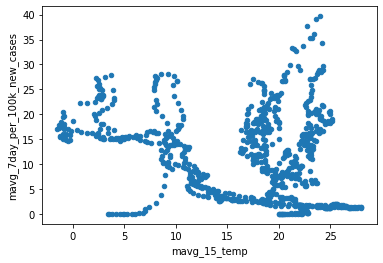

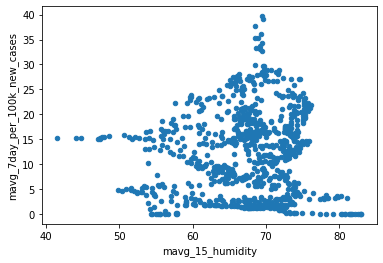

In [85]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
Combined_df_all_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
Combined_df_all_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

Simple Linear Regression Model- TEMPRETURE, HUMIDITY, CITY CODE with MAVG_7day_per_100k_new_cases


In [80]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training

In [81]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_all = Combined_df_all_Reg[["mavg_15_temp","mavg_15_humidity","is_newyork"]]
y_all = Combined_df_all_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_all.shape, y_all.shape)
#print(X_all)
#print(y_all)

Shape:  (886, 3) (886, 1)


In [82]:
#WE are not splitting the data as we want to use all data into the train  
#X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, random_state=42,stratify = True)
#X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, train_size=1.0,test_size=0.0, random_state=42)

In [66]:
# Create the model
model_all = linear_model.LinearRegression()
# Fit the model to the training data. 
model_all.fit(X_all, y_all)

LinearRegression()

In [67]:
# Use our model to make predictions
predicted= model_all.predict(X_all)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_all, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_all, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_all.coef_)
print('intercept:', model_all.intercept_)

mean squared error (MSE): 48.809054423686256
R-squared (R2): 0.3177470498469601
Coefficients: 
 [[ -0.67294798  -0.02484348 -10.39035159]]
intercept: [29.84871747]


In [68]:
# Call the `score()` method on the model to show the R2 score
model_all.score(X_all, y_all)

0.3177470498469601

Modified Regression Model for TEMP only- TEMPRETURE, CITY CODE with MAVG_7day_per_100k_new_cases

In [26]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_all_temp = Combined_df_all_Reg[["mavg_15_temp","is_newyork"]]
y_all_temp = Combined_df_all_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_all_temp.shape, y_all_temp.shape)
#print(X_all_temp)
#print(y_all_temp)

Shape:  (886, 2) (886, 1)


In [27]:
# Create the model
model_all_temp = linear_model.LinearRegression()
# Fit the model to the training data. 
model_all_temp.fit(X_all_temp, y_all_temp)

LinearRegression()

In [28]:
# Use our model to make predictions
predicted= model_all_temp.predict(X_all_temp)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_all_temp, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_all_temp, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_all_temp.coef_)
print('intercept:', model_all_temp.intercept_)

mean squared error (MSE): 48.82446095385067
R-squared (R2): 0.31753169737229314
Coefficients: 
 [[ -0.67983045 -10.26442788]]
intercept: [28.22399894]


In [50]:
# Call the `score()` method on the model to show the R2 score
model_all_temp.score(X_all_temp, y_all_temp)

0.31753169737229314

Modiefied Regression Model with only HUMIDITY- HUMIDITY, CITY CODE with MAVG_7day_per_100k_new_cases

In [29]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_all_humidity = Combined_df_all_Reg[["mavg_15_humidity","is_newyork"]]
y_all_humidity = Combined_df_all_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_all_humidity.shape, y_all_humidity.shape)
#print(X_all_humidity)
#print(y_all_humidity)

Shape:  (886, 2) (886, 1)


In [30]:
# Create the model
model_all_humidity = linear_model.LinearRegression()
# Fit the model to the training data. 
model_all_humidity.fit(X_all_humidity, y_all_humidity)

LinearRegression()

In [31]:
# Use our model to make predictions
predicted= model_all_humidity.predict(X_all_humidity)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_all_humidity, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_all_humidity, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_all_humidity.coef_)
print('intercept:', model_all_humidity.intercept_)

mean squared error (MSE): 63.67633276815933
R-squared (R2): 0.10993223698017363
Coefficients: 
 [[-0.27003314 -6.7996264 ]]
intercept: [33.37821733]


In [49]:
# Call the `score()` method on the model to show the R2 score
model_all_humidity.score(X_all_humidity, y_all_humidity)

0.10993223698017363

# Linear Regression- New York alone

In [34]:
print(NY_Combined_df.shape)
NY_Combined_df.head()


(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [35]:
NY_Combined_Reg= NY_Combined_df.drop(["Reported_Date","City"], axis=1)
NY_Combined_Reg.head()

,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

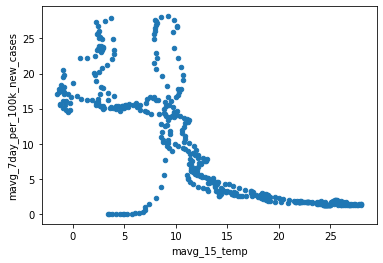

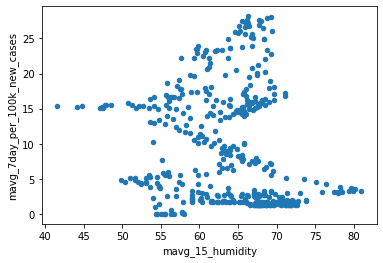

In [84]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

Simple Linear Regression Model- TEMPRETURE, HUMIDITY with MAVG_7day_per_100k_new_cases

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training and testing data

In [42]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_NY_both = NY_Combined_Reg[["mavg_15_temp","mavg_15_humidity"]]
y_NY_both = NY_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_NY_both.shape, y_NY_both.shape)
#print(X_NY_both)
#print(y_NY_both)

Shape:  (443, 2) (443, 1)


In [43]:
#WE are not splitting the data as we want to use all data into the train  


In [45]:
# Create the model
model_NY_both = linear_model.LinearRegression()

In [46]:
# Fit the model to the training data. 
#model.fit(X_train, y_train)
model_NY_both.fit(X_NY_both, y_NY_both)

LinearRegression()

In [47]:
# Use our model to make predictions
predicted = model_NY_both.predict(X_NY_both)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_NY_both, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_NY_both, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_NY_both.coef_)
print('intercept:', model_NY_both.intercept_)


mean squared error (MSE): 26.13768873196065
R-squared (R2): 0.5995014517681266
Coefficients: 
 [[-0.79141555  0.14548759]]
intercept: [10.08624177]


In [48]:
# Call the `score()` method on the model to show the R2 score
model_NY_both.score(X_NY_both, y_NY_both)

0.5995014517681266

Modifying model to check difference if only temp is used as a variable

In [95]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_NY_Temp = NY_Combined_Reg["mavg_15_temp"].values.reshape(-1, 1)
y_NY_Temp = NY_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_NY_Temp.shape, y_NY_Temp.shape)
#print(X_NY_Temp)
#print(y_NY_Temp)

Shape:  (443, 1) (443, 1)


In [96]:
# Create the model
model_NY_Temp = linear_model.LinearRegression()

In [99]:
# Fit the model to the training data. 
#model.fit(X_train, y_train)
model_NY_Temp.fit(X_NY_Temp, y_NY_Temp)

LinearRegression()

In [101]:
# Use our model to make predictions
predicted = model_NY_Temp.predict(X_NY_Temp)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_NY_Temp, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_NY_Temp, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_NY_Temp.coef_)
print('intercept:', model_NY_Temp.intercept_)

mean squared error (MSE): 26.90417126223218
R-squared (R2): 0.5877569113932358
Coefficients: 
 [[-0.75093355]]
intercept: [18.86118889]


# Linear Regression- Sao Paulo alone

In [87]:
print(SP_Combined_df.shape)
SP_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2020-02-29,Sao Paulo,0,0,0.00,0.0,20.47,85.96,20.22,83.51,22.21,80.34
444,2020-03-01,Sao Paulo,0,0,0.00,0.0,19.50,85.50,20.37,83.58,22.16,80.81
445,2020-03-02,Sao Paulo,0,0,0.00,0.0,19.61,85.81,20.49,84.47,21.90,81.65
446,2020-03-03,Sao Paulo,0,0,0.00,0.0,19.17,85.53,20.32,85.33,21.61,82.19
447,2020-03-04,Sao Paulo,1,0,0.01,0.0,19.61,79.08,19.79,85.83,21.24,82.76


In [88]:
SP_Combined_Reg= SP_Combined_df.drop(["Reported_Date","City"], axis=1)
SP_Combined_Reg.head()

,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,0,0,0.00,0.0,20.47,85.96,20.22,83.51,22.21,80.34
444,0,0,0.00,0.0,19.50,85.50,20.37,83.58,22.16,80.81
445,0,0,0.00,0.0,19.61,85.81,20.49,84.47,21.90,81.65
446,0,0,0.00,0.0,19.17,85.53,20.32,85.33,21.61,82.19
447,1,0,0.01,0.0,19.61,79.08,19.79,85.83,21.24,82.76


Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

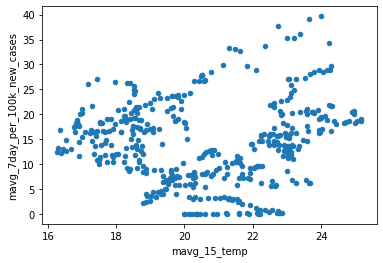

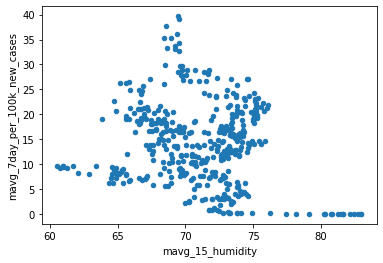

In [89]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
SP_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
SP_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

Simple Linear Regression Model- TEMPRETURE, HUMIDITY with MAVG_7day_per_100k_new_cases

In [90]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training and testing data

In [102]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_SP_both = SP_Combined_Reg[["mavg_15_temp","mavg_15_humidity"]]
y_SP_both = SP_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_SP_both.shape, y_SP_both.shape)
#print(X_SP_both)
#print(y_SP_both)



Shape:  (443, 2) (443, 1)


In [103]:
#WE are not splitting the data as we want to use all data into the train  
#split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60,test_size=0.40, random_state=42)

In [104]:
# Create the model
model_SP_both = linear_model.LinearRegression()

In [106]:
# Fit the model to the training data. 
model_SP_both.fit(X_SP_both, y_SP_both)

LinearRegression()

In [107]:
# Use our model to make predictions
predicted = model_SP_both.predict(X_SP_both)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_SP_both, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_SP_both, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_SP_both.coef_)
print('intercept:', model_SP_both.intercept_)

mean squared error (MSE): 62.72028045761924
R-squared (R2): 0.05168768077673047
Coefficients: 
 [[ 0.40810781 -0.46844933]]
intercept: [39.0550793]


In [108]:
# Call the `score()` method on the model to show the R2 score
model.score(X_SP_both, y_SP_both)

0.05168768077673047

Modifying model to check difference if only temp is used as a variable

In [110]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_SP_temp = SP_Combined_Reg["mavg_15_temp"].values.reshape(-1, 1)
y_SP_temp = SP_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_SP_temp.shape, y_SP_temp.shape)
#print(X_SP_temp)
#print(y_SP_temp)


Shape:  (443, 1) (443, 1)


In [111]:
# Create the model
model_SP_temp = linear_model.LinearRegression()

In [112]:
# Fit the model to the training data. 
model_SP_temp.fit(X_SP_temp, y_SP_temp)

LinearRegression()

In [113]:
# Use our model to make predictions
predicted = model_SP_temp.predict(X_SP_temp)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_SP_temp, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_SP_temp, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_SP_temp.coef_)
print('intercept:', model_SP_temp.intercept_)

mean squared error (MSE): 65.72903528872156
R-squared (R2): 0.006196186621425737
Coefficients: 
 [[0.28607747]]
intercept: [8.25924912]


In [ ]:
# Call the `score()` method on the model to show the R2 score
model_SP_temp.score(X_SP_temp, y_SP_temp)